## One-Sample T-tests

One-sample t-tests are used to compare a sample mean to an expected population mean. They are used for a sample of one quantitative variable. For example, we could use a one-sample t-test to determine if the average amount of time customers spend browsing a shoe boutique is longer than 10 minutes.

The below example shows the age of players in a soccer team Arsene FC in England. Suppose the average age of all soccer teams in England is 20 years. Now, we want to test if the average age of players from this particular football club is different than the standard average age.

We define the null hypothesis as:
**mean of age of players at Arsene FC is not significantly different than the average age of all soccer teams in England.**

In python, one sample t-test is implemented in the `ttest_1samp()` in the scipy package that require two inputs - a sample distribution (x) and a mean (popmean) to test against.

Note: This function performs a two tailed test by default, more on this later. 

In [1]:
from scipy.stats import ttest_1samp
x =  [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1]
tscore, pvalue = ttest_1samp(x, popmean=20)
print("t Statistic: ", tscore)
print("P Value: ", pvalue)

t Statistic:  0.34790160414739335
P Value:  0.7351260907906914


The function `ttest_1samp` returns two outputs: the t-statistic and the p-value.

A p-value is a probability value describing how likely it is that your data would have occurred by chance (i.e. the null hypothesis is true). The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- A p-value less than 0.05 is statistically significant. It indicates strong evidence against the null hypothesis.Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
- A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.


Now, we see from the above t-test that the p-value >>0.05. Hence we accept the null hypothesis and be reasonably confident that the average age of players in Arsene FC team is no different than the average age of players of soccer teams in England.


Lets say a new soccer team Watford FC is formed with the below age(x) of players. Here again, we want to test the null hypthesis that the average age of players in Watford FC team is no different than the average age of players of soccer teams in England.

In [2]:
from scipy.stats import ttest_1samp
x =  [11.5, 19.5, 18.5, 17.2, 14.5, 13.2, 12.1, 10.5, 19.4, 18.1, 24.1]
tscore, pvalue = ttest_1samp(x, popmean=20)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -2.9694705384006497
P Value:  0.014058542702836154


In this scenario, we see that the p-value is <0.05 ans is statistically significant. Hence, we reject the null hypothesis in this case and conclude the average age of players in Watford FC is different than the average age of players of all soccer teams.

Assumptions of a one sample t-test:

- The sample is randomly selected from the population. For example: if the players from the youth teams were selected in the sample instead of the playing XI. 
- The individual observations are independent. For example, if one visitor to a store loves the product so much that they convinced their friend to buy one too, those observations were not independent.
- The data is normally distributed without outliers or the sample is large enough.

## Binomial test

The binomial test is used when an experiment has two possible outcomes (i.e. success/failure) and you have an idea about what the probability of success is. **A binomial test is run to see if observed test results differ from what was expected.**

Suppose there are 500 visitors to an e-commerce website this month and 40 of them made a purchase. If each of the 500 visitors had a 10% chance of making a purchase, we would expect around 50 of those visitors to buy something. Is 41 different enough from 50 that we should question whether this months’ site visitors really had a 10% chance of making a purchase?

We define our null hypothesis: the true probability of a visitor making a purchase was exactly 10%, but by random chance, we observed that only 40 visitors (8%) made a purchase.

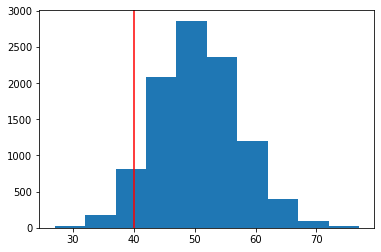

In [4]:
import numpy as np
import matplotlib.pyplot as plt
null_outcomes = []

for i in range(10000):
    #simulate the population
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    #sum all the visitors who made a purchase
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    #list of the sum of visitors who made a purchase from each sample size of 500 visitors
    null_outcomes.append(num_purchased)

#plot the histogram here:
plt.hist(null_outcomes)
plt.axvline(40,color='r')
plt.show();

In [5]:
#calculate the 90% interval here:
null_90CI = np.percentile(null_outcomes,[2.5,97.5])
print(null_90CI)

[37. 64.]


In [6]:
#calculate the p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <=40)/len(null_outcomes)
print(p_value)

0.0732


In [7]:
#calculate two sided p-value here:
null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 40) | (null_outcomes >= 60))/len(null_outcomes)
print(p_value)

0.1575


Now, we define a function to simulate a binomial test using the above concepts.

In [8]:
def simulation_binomial_test(observed_successes,n,p):
    #initialize null_outcomes
    null_outcomes = []
    
    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)
        
    #calculate a 1-sided p-value
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  
    #return the p-value
    return p_value

In [9]:
p_value1 = simulation_binomial_test(40, 500, .1)
print("simulation p-value: ", p_value1)

simulation p-value:  0.0746


The same binomial test can be performed using `binom_test` function in scipy library.

In [10]:
from scipy.stats import binom_test

# calculate p_value_2sided here:
p_value_2sided = binom_test(40,500,p=0.1)
# calculate p_value_1sided here:
p_value_1sided = binom_test(40,500,p=0.1,alternative = 'less')
print(p_value_1sided)

0.07508928965905827


We can see the p-value calculated using the scipy `binom_test` function is similar to the value generated using the simulated function `simulation_binomial_test`. 

Here the p-value greater > 0.05. Hence we accept the null hypothesis that the true probability of a visitor making a purchase was exactly 10%, but by random chance, we observed that only 40 visitors (8%) made a purchase.

# Two-Sample T-tests

A two sample t-test is used to comparing the means of two groups if they come from different populations. For example, comparing average height of men and women. 

In the below example we will use the iris dataset to compare the sepal width for the two species of iris flowers setosa and virginica using the `ttest_ind` function from scipy library.

Here our null hypothesis is that true difference between these group means of the sepal width is zero. While the alternate hypothesis is that the true difference is different from zero.

In [11]:
import pandas as pd

data = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Subset data for the two species
setosa = df[df.species =='setosa']['sepal_width']
virginica = df[df.species == 'virginica']['sepal_width']

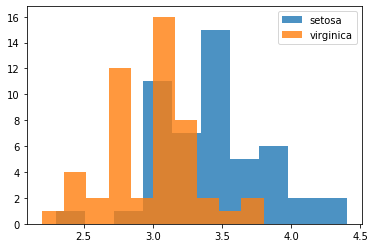

In [13]:
# plot overlapping histograms
plt.hist(list(setosa), alpha=.8, label='setosa')
plt.hist(list(virginica), alpha=.8, label='virginica')
plt.legend()
plt.show()

In [14]:
# perform two tailed t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(setosa,virginica)
print(pval)

8.916634067006443e-09


Since the p-value <<<0.0.05, we reject the null hypothesis and conclude the mean sepal width for the two species of iris flower is different from each other.